# Deep Learning EDA + Modeling + Evaluation

## Load in data and set chart preferences

In [1]:
# Import core data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cyber punk theme for charts
plt.style.use('default')

# Global dictionary
plt.rcParams.update({
    # Canvas and axes
    'figure.facecolor': 'black',
    'axes.facecolor': '#0d0d0d',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'axes.titlecolor': 'white',

    # Tick appearance
    'xtick.color': 'white',
    'ytick.color': 'white',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    # Grid
    'axes.grid': True,
    'grid.color': '#333333',
    'grid.linestyle': '--',
    'grid.linewidth': 0.4,

    # Line colors
    'axes.prop_cycle': plt.cycler(color=[
        '#ff2e2e',  # main red
        '#00eaff',  # cyan
        '#40ffb3',  # teal-green
        '#ff9f1c',  # amber for contrast
        '#d11aff'   # purple accent (deep, not neon)
    ]),

    # Text
    'text.color': 'white',

    # Legend
    'legend.facecolor': '#1a1a1a',
    'legend.edgecolor': 'white',
    'legend.fontsize': 10,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 6,


    'savefig.facecolor': 'black',
    'savefig.edgecolor': 'black',
})


In [3]:
# Set absolute path for processed hugging face datasets
import os
os.environ["HF_DATASETS_CACHE"] = r"C:\Users\User\Documents\school\Data Analysis projects\cyber_threat_nlp\processed"

In [4]:
# Absolute path
data_path = r'C:\Users\User\Documents\school\Data Analysis projects\cyber_threat_nlp\data\TheHackerNews_Dataset.xlsx'

In [5]:
# Read in XLSX file from PATH
df = pd.read_excel(data_path, engine='openpyxl')

## Data Summary & EDA

In [6]:
# Print first 10 rows
df

,Title,Link,Article,Label
0,Critical Cosmos Database Flaw Affected Thousan...,https://thehackernews.com/2021/08/critical-cos...,Cloud infrastructure security company Wiz on T...,Data_Breaches
1,Researchers Detail Modus Operandi of ShinyHunt...,https://thehackernews.com/2021/08/researchers-...,"ShinyHunters, a notorious cybercriminal underg...",Data_Breaches
2,Chinese Hackers Believed to be Behind Second C...,https://thehackernews.com/2021/06/chinese-hack...,Even as a massive data breach affecting Air In...,Data_Breaches
3,Using Breached Password Detection Services to ...,https://thehackernews.com/2021/06/using-breach...,Bolstering password policies in your organizat...,Data_Breaches
4,Can Data Protection Systems Prevent Data At Re...,https://thehackernews.com/2021/05/can-data-pro...,Protection against insider risks works when th...,Data_Breaches
...,...,...,...,...
3737,Chinese hackers attack on White House computers,https://thehackernews.com/2012/10/chinese-hack...,The White House acknowledged Monday that one o...,Cyber_Attack
3738,Cyber Attacks on Six Major American Banks,https://thehackernews.com/2012/10/cyber-attack...,"According to reports, some of the United State...",Cyber_Attack
3739,9 million PCs infected with ZeroAccess botnet,https://thehackernews.com/2012/09/9-million-pc...,"In recent months, we've seen the rootkit famil...",Cyber_Attack
3740,Bharatiya Janata Party website defaced by Anon...,https://thehackernews.com/2012/09/bharatiya-ja...,Hackers from Indian Anonymous Group hacked Bha...,Cyber_Attack


In [7]:
# Check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    3742 non-null   object
 1   Link     3742 non-null   object
 2   Article  3742 non-null   object
 3   Label    3742 non-null   object
dtypes: object(4)
memory usage: 117.1+ KB


In [8]:
# Get basic stats for text dataset
df.describe()

,Title,Link,Article,Label
count,3742,3742,3742,3742
unique,3223,3223,3224,4
top,Importance of Logs and Log Management for IT S...,https://thehackernews.com/2013/10/importance-o...,Cyber operatives affiliated with the Russian F...,Vulnerability
freq,3,3,3,1352


In [9]:
# Check for duplicates
print('Amount of duplicate articles:', df.duplicated().sum())

Amount of duplicate articles: 0


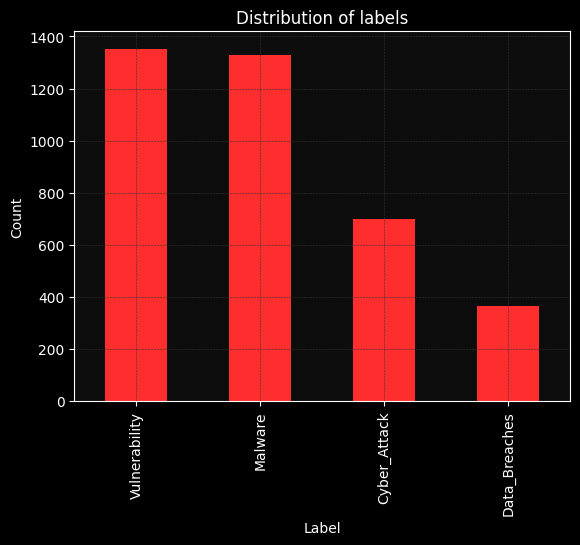

In [10]:
# Check for class imbalances
df['Label'].value_counts().plot(kind='bar', title='Distribution of labels', ylabel='Count')
plt.show()

# 2 classes dominate using accuracy as a metric may be misleading - we can do macro F1 or class weights

In [11]:
# Check for class imbalance percentage
print('Label Proportion Percentages:\n', df['Label'].value_counts(normalize=True) * 100)

Label Proportion Percentages:
 Label
Vulnerability    36.130412
Malware          35.462320
Cyber_Attack     18.679850
Data_Breaches     9.727418
Name: proportion, dtype: float64


In [12]:
# Concatenate title and text
df['full_text'] = df[['Title', 'Article']].fillna("").agg(" ".join, axis=1).str.strip()

# Word count
df['word_count'] = df['full_text'].str.count(r'\w+')

In [13]:
# Check that concatenation was successful
df['full_text'][0]

'Critical Cosmos Database Flaw Affected Thousands of Microsoft Azure Customers Cloud infrastructure security company Wiz on Thursday revealed details of a now-fixed Azure Cosmos database vulnerability that could have been potentially exploited to grant any Azure user full admin access to other customers\' database instances without any authorization.\nThe flaw, which grants read, write, and delete privileges, has been dubbed "ChaosDB," with Wiz researchers noting that "the vulnerability has a trivial exploit that doesn\'t require any previous access to the target environment, and impacts thousands of organizations, including numerous Fortune 500 companies."\nCosmos DB is Microsoft\'s proprietary NoSQL database that\'s advertised as "a fully managed service" that "takes database administration off your hands with automatic management, updates and patching."\nThe Wiz Research Team reported the issue to Microsoft on August 12, after which the Windows maker took steps to mitigate the issue

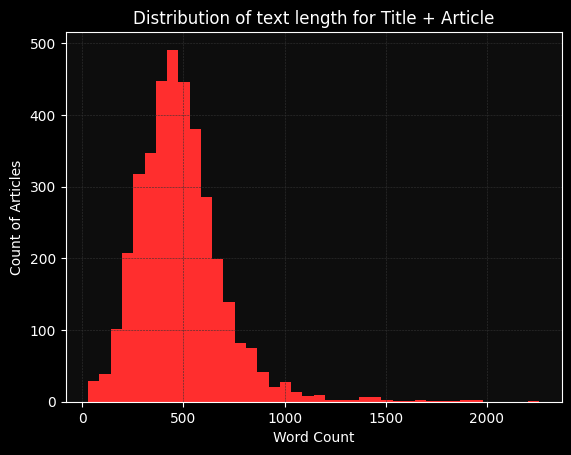

Basic stat summary for text length:
count    3742.000000
mean      485.029931
std       212.213035
min        30.000000
25%       352.000000
50%       461.500000
75%       586.750000
max      2258.000000
Name: word_count, dtype: float64


In [14]:
# Plot Distribution of Title + Article word count
df['word_count'].hist(bins=40)
plt.title('Distribution of text length for Title + Article')
plt.xlabel('Word Count')
plt.ylabel('Count of Articles')
plt.show()

# Check basic statistics for title + article word count
print(f'Basic stat summary for text length:\n{df["word_count"].describe()}')

# This shows an average of around 500 for the word count with some documents going into the thousands.
# We may need to use a model with a large sequence length such as distillongformer or use the max context windows

## Preprocessing

In [15]:
# Import DL libraries
import torch
import random
import json
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification

In [16]:
df

,Title,Link,Article,Label,full_text,word_count
0,Critical Cosmos Database Flaw Affected Thousan...,https://thehackernews.com/2021/08/critical-cos...,Cloud infrastructure security company Wiz on T...,Data_Breaches,Critical Cosmos Database Flaw Affected Thousan...,401
1,Researchers Detail Modus Operandi of ShinyHunt...,https://thehackernews.com/2021/08/researchers-...,"ShinyHunters, a notorious cybercriminal underg...",Data_Breaches,Researchers Detail Modus Operandi of ShinyHunt...,436
2,Chinese Hackers Believed to be Behind Second C...,https://thehackernews.com/2021/06/chinese-hack...,Even as a massive data breach affecting Air In...,Data_Breaches,Chinese Hackers Believed to be Behind Second C...,905
3,Using Breached Password Detection Services to ...,https://thehackernews.com/2021/06/using-breach...,Bolstering password policies in your organizat...,Data_Breaches,Using Breached Password Detection Services to ...,991
4,Can Data Protection Systems Prevent Data At Re...,https://thehackernews.com/2021/05/can-data-pro...,Protection against insider risks works when th...,Data_Breaches,Can Data Protection Systems Prevent Data At Re...,983
...,...,...,...,...,...,...
3737,Chinese hackers attack on White House computers,https://thehackernews.com/2012/10/chinese-hack...,The White House acknowledged Monday that one o...,Cyber_Attack,Chinese hackers attack on White House computer...,283
3738,Cyber Attacks on Six Major American Banks,https://thehackernews.com/2012/10/cyber-attack...,"According to reports, some of the United State...",Cyber_Attack,Cyber Attacks on Six Major American Banks Acco...,433
3739,9 million PCs infected with ZeroAccess botnet,https://thehackernews.com/2012/09/9-million-pc...,"In recent months, we've seen the rootkit famil...",Cyber_Attack,9 million PCs infected with ZeroAccess botnet ...,574
3740,Bharatiya Janata Party website defaced by Anon...,https://thehackernews.com/2012/09/bharatiya-ja...,Hackers from Indian Anonymous Group hacked Bha...,Cyber_Attack,Bharatiya Janata Party website defaced by Anon...,197


In [17]:
# Set seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [18]:
# Label encode for transformer
le = LabelEncoder()
df['label_id'] = le.fit_transform(df['Label'])

# Create class dictionary in JSON
label2id = {label: int(i) for label, i in zip(le.classes_, range(len(le.classes_)))}
id2label = {v: k for k, v in label2id.items()}

print(label2id)
print(id2label)

{'Cyber_Attack': 0, 'Data_Breaches': 1, 'Malware': 2, 'Vulnerability': 3}
{0: 'Cyber_Attack', 1: 'Data_Breaches', 2: 'Malware', 3: 'Vulnerability'}


In [19]:
# Clean dataframe for modeling
model_df = df[['full_text', 'Label', 'label_id']]

In [20]:
# Save class dictionaries as JSON file
PROCESSED_DIR = Path("..") / 'processed'
PROCESSED_DIR.mkdir(exist_ok=True)

with open(PROCESSED_DIR / 'label2id.json', 'w')as f:
    json.dump(label2id, f)

with open(PROCESSED_DIR / 'id2label.json', 'w') as f:
    json.dump(id2label, f)

In [21]:
# Create training, validation, testing splits
# Make sure labels are stratified since we have a class imbalance
train_df, temp_df = train_test_split(
    model_df,
    test_size=0.2,
    stratify=model_df['label_id'],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['label_id'],
    random_state=42
)

# Extract label percentages
for name, split in [('train', train_df), ('val', val_df), ('test', test_df)]:
    print(name, split.shape[0])
    print(split['Label'].value_counts(normalize=True))
    print('-' * 40)

train 2993
Label
Vulnerability    0.361176
Malware          0.354828
Cyber_Attack     0.186769
Data_Breaches    0.097227
Name: proportion, dtype: float64
----------------------------------------
val 374
Label
Vulnerability    0.360963
Malware          0.352941
Cyber_Attack     0.187166
Data_Breaches    0.098930
Name: proportion, dtype: float64
----------------------------------------
test 375
Label
Vulnerability    0.362667
Malware          0.354667
Cyber_Attack     0.186667
Data_Breaches    0.096000
Name: proportion, dtype: float64
----------------------------------------


In [22]:
# Create Hugging Face Datasets
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

dataset = DatasetDict({
    'train': train_ds,
    'validation': val_ds,
    'test': test_ds
})

dataset

DatasetDict({
    train: Dataset({
        features: ['full_text', 'Label', 'label_id', '__index_level_0__'],
        num_rows: 2993
    })
    validation: Dataset({
        features: ['full_text', 'Label', 'label_id', '__index_level_0__'],
        num_rows: 374
    })
    test: Dataset({
        features: ['full_text', 'Label', 'label_id', '__index_level_0__'],
        num_rows: 375
    })
})

In [23]:
# Remove unneeded columns
dataset = dataset.remove_columns(['Label', '__index_level_0__'])

In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['full_text', 'label_id'],
        num_rows: 2993
    })
    validation: Dataset({
        features: ['full_text', 'label_id'],
        num_rows: 374
    })
    test: Dataset({
        features: ['full_text', 'label_id'],
        num_rows: 375
    })
})

In [25]:
# Initialize DeBERTa tokenizer
MODEL_NAME = "microsoft/deberta-v3-base"
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME, use_fast=False)

# Choose context window size based on EDA token percentiles
MAX_LEN = 512

In [26]:
# Create batch tokenizing function
def tokenize_batch(batch):
    """ Tokenizes a batch of texts and adds DeBERTa tokens."""
    return tokenizer(
        batch['full_text'],
        truncation=True,
        padding='max_length',
        max_length=MAX_LEN
    )

In [27]:
#Apply tokenization function
tokenized_dataset = dataset.map(
    tokenize_batch,
    batched=True,
    remove_columns=['full_text']
)

tokenized_dataset = tokenized_dataset.rename_column('label_id', 'labels')
tokenized_dataset.set_format(type='torch')
tokenized_dataset

Map:   0%|          | 0/2993 [00:00<?, ? examples/s]

Map:   0%|          | 0/374 [00:00<?, ? examples/s]

Map:   0%|          | 0/375 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2993
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 374
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 375
    })
})

In [28]:
# Save processed datasets
tokenized_dataset.save_to_disk(r'C:\Users\User\Documents\school\Data Analysis projects\cyber_threat_nlp\processed\tokenized_DeBERTa_ds')
print('Saved tokenized dataset to disk.')

Saving the dataset (0/1 shards):   0%|          | 0/2993 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/374 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/375 [00:00<?, ? examples/s]

Saved tokenized dataset to disk.


## Modeling


In [29]:
# Import modeling libraries
from datasets import load_from_disk
from transformers import TrainingArguments, Trainer, AutoConfig
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn
import torch.nn.functional as F



# Chose whether models use CPU or GPU
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load tokenized dataset
ds = load_from_disk('../processed/tokenized_DeBERTa_ds')

In [30]:
# Check if venv can detect and use GPU
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.cuda.get_device_name(0))

True
12.1
NVIDIA GeForce RTX 4070 Laptop GPU


In [31]:
# Load label mappings that we previously saved
with open('../processed/label2id.json') as f:
    label2id = json.load(f)

with open('../processed/id2label.json') as f:
    id2label = json.load(f)

num_labels = len(label2id)
num_labels # Amount of classes in label

4

In [32]:
# Create focal loss class for better classification for imbalanced classes
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, weight=None):
        super().__init__()
        self.gamma = gamma
        self.weight = weight

    def forward(self, logits, targets):
        ce_loss = F.cross_entropy(logits, targets, reduction='none', weight=self.weight)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

class DebertaForFocalLoss(DebertaV2ForSequenceClassification):
    def __init__(self, config, gamma=2.0, class_weights=None):
        super().__init__(config)
        self.focal = FocalLoss(gamma=gamma, weight=class_weights)

    def compute_loss(self, model_output, labels):
        logits = model_output.logits
        loss = self.focal(logits, labels)
        return loss

In [33]:
# Create and add class weights
y_train = np.array(ds["train"]["labels"], dtype=int)

classes = np.unique(y_train)

class_weights_np = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
print('Class weights:', class_weights_np)

class_weights = torch.tensor(class_weights_np, dtype=torch.float).to(DEVICE)

Class weights: [1.33855098 2.57130584 0.70456685 0.69218316]


In [34]:
# Convert weights into tensors for loss functions
class_weight_tensor = torch.tensor(class_weights, dtype=torch.float)

C:\Users\User\AppData\Local\Temp\ipykernel_18216\1353044102.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weight_tensor = torch.tensor(class_weights, dtype=torch.float)


In [35]:
# Load in huggingface model
config = AutoConfig.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

model = DebertaForFocalLoss.from_pretrained(
    MODEL_NAME,
    config=config,
    class_weights=class_weight_tensor,
    gamma=2.0
)

Some weights of DebertaForFocalLoss were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
# Create evaluation matrics function for trainer
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    preds = np.argmax(logits, axis=1)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='weighted', zero_division=0
    )

    return {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': acc
    }

In [37]:
# Hyperparam run 1

# Tuning the training arguments config
training_args = TrainingArguments(
    output_dir='../models/DeBERTa_model',

    # Logging
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_strategy='steps',
    logging_steps=50,

    # Training hyperparams
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=2e-5,
    warmup_ratio=0.1,

    # Regularization
    weight_decay=0.01,

    # Memory optimization
    gradient_accumulation_steps=8,
    gradient_checkpointing=False,
    fp16=False,
    bf16=True,

    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

In [38]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds['train'],
    eval_dataset=ds['validation'],
    processing_class=tokenizer,
    compute_metrics=compute_metrics
)

In [39]:
# Train model
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Precision,Recall,Accuracy
0,0.970000,0.810142,0.672038,0.682935,0.703209,0.703209
1,0.718700,0.717161,0.712177,0.709581,0.724599,0.724599
2,0.617300,0.674962,0.735609,0.733748,0.737968,0.737968


TrainOutput(global_step=561, training_loss=0.813461222113135, metrics={'train_runtime': 940.5141, 'train_samples_per_second': 9.547, 'train_steps_per_second': 0.596, 'total_flos': 2361243355226112.0, 'train_loss': 0.813461222113135, 'epoch': 2.997995991983968})

In [40]:
# Create eval function for validation and test set metrics
def eval_report(trainer, ds):
    preds = trainer.predict(ds)
    y_true = preds.label_ids
    y_pred = preds.predictions.argmax(axis=1)
    print(classification_report(y_true, y_pred, digits=4))

In [41]:
# Produce validation set metrics
eval_report(trainer, ds['validation'])

              precision    recall  f1-score   support

           0     0.5231    0.4857    0.5037        70
           1     0.7500    0.7297    0.7397        37
           2     0.7293    0.7348    0.7321       132
           3     0.8429    0.8741    0.8582       135

    accuracy                         0.7380       374
   macro avg     0.7113    0.7061    0.7084       374
weighted avg     0.7337    0.7380    0.7356       374



## Evaluation: Validation

In [42]:
# Check which checkpoint holds the best model
best_checkpoint_model = trainer.state.best_model_checkpoint
print(best_checkpoint_model)

../models/DeBERTa_model\checkpoint-561


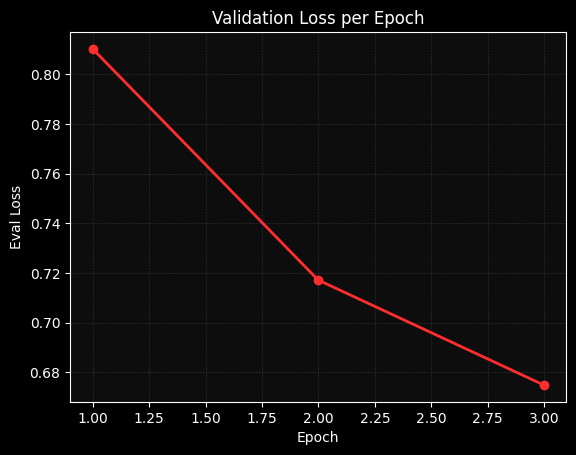

In [43]:
# Plot validation loss
history = pd.DataFrame(trainer.state.log_history)

eval_hist = history[history['eval_loss'].notna()]

plt.plot(eval_hist['epoch'], eval_hist['eval_loss'], marker='o')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.show()

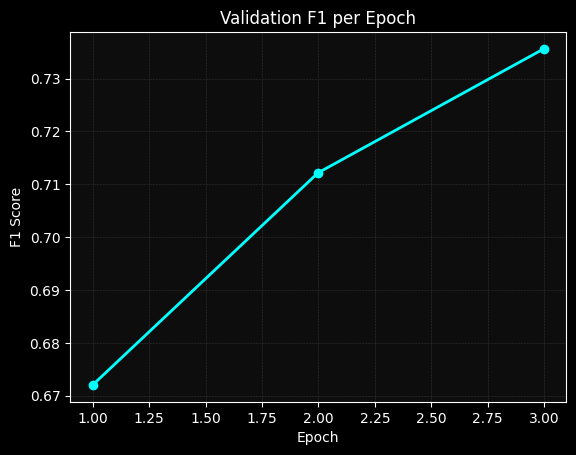

In [44]:
# Plot validation F1 curve
plt.plot(eval_hist['epoch'], eval_hist['eval_f1'], marker='o', color='cyan')
plt.title('Validation F1 per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.show()

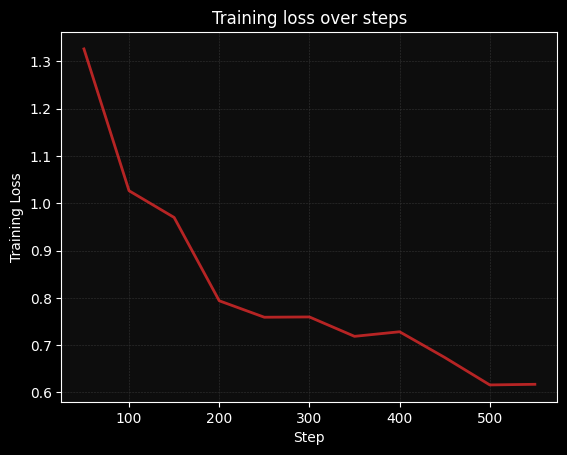

In [45]:
# Plot loss vs steps
train_hist = history[history['loss'].notna()]

plt.plot(train_hist['step'], train_hist['loss'], alpha=0.7)
plt.title("Training loss over steps")
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.show()

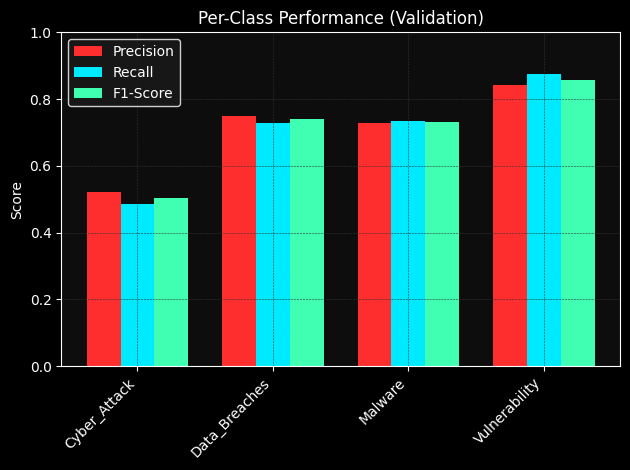

In [46]:
# plot per-class metrics
preds = trainer.predict(ds['validation'])
y_true = preds.label_ids
y_pred = preds.predictions.argmax(axis=1)

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)
id2label_eval = {int(k): v for k, v in id2label.items()}
classes = [id2label_eval[i] for i in range(len(precision))]

x = np.arange(len(classes))
width = 0.25

plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')
plt.xticks(x, classes, rotation=45, ha='right')
plt.ylabel('Score')
plt.title("Per-Class Performance (Validation)")
plt.ylim(0, 1)

plt.legend()
plt.tight_layout()
plt.show()

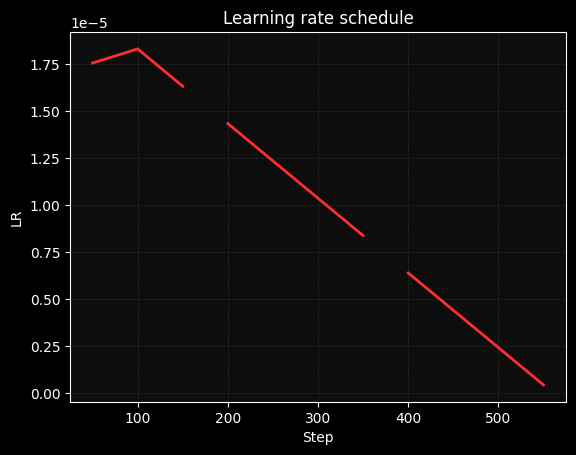

In [47]:
# Plot Learning Rate vs steps (note the gaps are due to the logged steps)
plt.plot(history['step'], history['learning_rate'])
plt.title('Learning rate schedule')
plt.xlabel('Step')
plt.ylabel('LR')
plt.show()

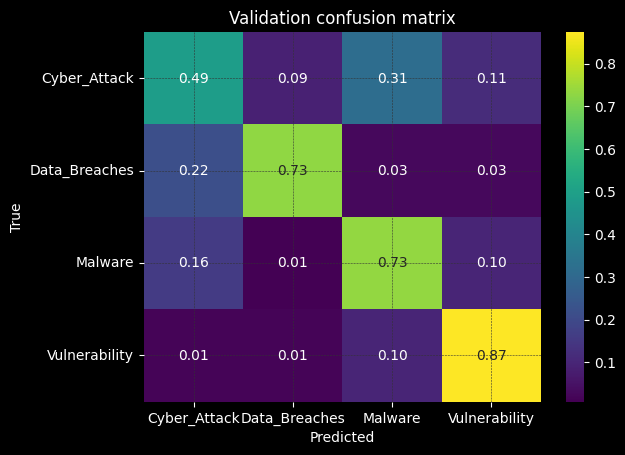

In [50]:
# Plot confusion matrix for all classes
cm = confusion_matrix(y_true, y_pred, normalize='true')
labels = [id2label_eval[i] for i in range(len(id2label_eval))]

sns.heatmap(cm, annot=True, fmt='.2f',
            cmap='viridis',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel("True")
plt.title("Validation confusion matrix")
plt.show()